<H1>Total Plots</H1>

This code will add the large scale and small scale components to create a final gridded product.

In [280]:
#initialize settings
import numpy as np
from tqdm import tqdm
#from largescalefunctions import *
import xarray as xr
import scipy.io as sio
import cmocean as cmocean
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.path as mpath                  # to draw circle for map
import cartopy                                   # to make map
import cartopy.crs as ccrs               # for map projection
import cartopy.feature as cfeature           # to add land features to map
from datetime import date               # for saving figures with today
import matplotlib.animation as animation
from PIL import Image
from scipy.stats import norm
from scipy.optimize import curve_fit

In [281]:
#set where to open files from and save figures. 
lsroot = '/global/homes/k/kefalc/code/anom_files/' #large scale root
ssroot = '/global/homes/k/kefalc/code/covar_files/' #small scale root
savepath = '/global/homes/k/kefalc/code/plots/'

<h3>T and S</h3>

In [3]:
#open large scale dataset
ls = xr.open_dataset('/global/homes/k/kefalc/code/anom_files/grid_TS_mean_ws500_plevel3_dates16436.0_18261.0_test0.nc')
#display(ls)
lon  = ls['longitude'].values
lat  = ls['latitude'].values

mean_temp = np.squeeze(ls['mean_temp'].values)
mean_sal = np.squeeze(ls['mean_sal'].values)
print(mean_sal.shape)

(21, 11, 61)


In [4]:
#open small scale dataset
ss = xr.open_dataset('/global/homes/k/kefalc/code/covar_files/grid_anom_ws707_N1_plevel3_dates16436.0_18261.0_test0.nc')
#display(ss)

temp_anom = np.squeeze(ss['anom'][:,:,:,0].values)
sal_anom = np.squeeze(ss['anom'][:,:,:,1].values)
print(temp_anom.shape)

(21, 11, 61)


<h2>Temperature</h2>

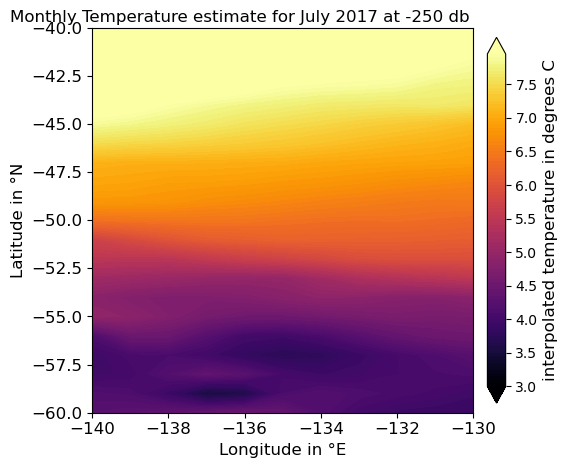

In [8]:
##Temperature

lev1 = np.arange(3,8,.05)
fs = 12

lon2,lat2 = np.meshgrid(lon,lat)

#print(name_string)

tt = 30
fig  = plt.figure(figsize=(6,5))
plt.contourf(lon2,lat2,mean_temp[:,:,tt]+temp_anom[:,:,tt],cmap=plt.cm.inferno,extend='both',levels=lev1)
cbar=plt.colorbar(orientation='vertical',shrink=0.95,pad=0.03)#,ticks=cticks) #fraction=0.075, pad=0.15,shrink=1.0
cbar.set_label('interpolated temperature in degrees C',fontsize=fs)
plt.xlabel('Longitude in °E',fontsize=fs)
plt.ylabel('Latitude in °N',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#cbar.ax.set_xticklabels(cticks_label)
plt.annotate(('Monthly Temperature estimate for July ' + str(2017)) + ' at ' + str(-250) + ' db',xy=(0.99,1.015),
             xycoords='axes fraction',fontsize=fs,ha='right')
#plt.annotate('time step '+str(tt+1),xy=(0.99,1.015),\
#                     xycoords='axes fraction',fontsize=fs,ha='right')#,color='k',fontweight='bold')
#plt.show()
plt.savefig(savepath + 'temp_total_250db_July2017_5yr.png')

In [7]:
ls.time[tt]

<xarray.DataArray 'time' ()>
array('2017-07-04T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2017-07-04
Attributes:
    standard_name:  time

<h2>Salinity</h2>

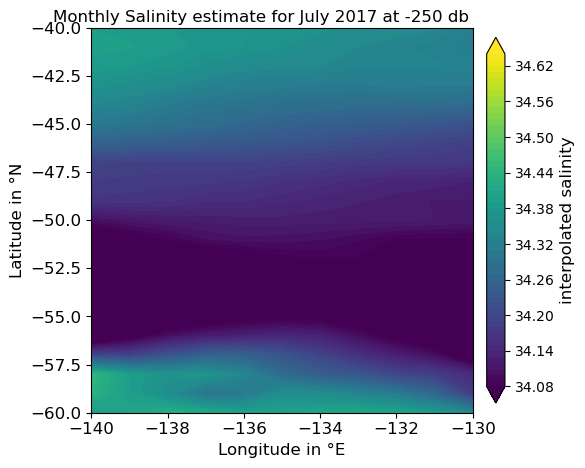

In [9]:
##Salinity

lev1 = np.arange(34.08,34.64,0.01)
fs = 12

lon2,lat2 = np.meshgrid(lon,lat)

#print(name_string)

tt = 30
fig  = plt.figure(figsize=(6,5))
plt.contourf(lon2,lat2,mean_sal[:,:,tt]+sal_anom[:,:,tt],cmap=plt.cm.viridis,extend='both',levels=lev1)
cbar=plt.colorbar(orientation='vertical',shrink=0.95,pad=0.03)#,ticks=cticks) #fraction=0.075, pad=0.15,shrink=1.0
cbar.set_label('interpolated salinity',fontsize=fs)
plt.xlabel('Longitude in °E',fontsize=fs)
plt.ylabel('Latitude in °N',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#cbar.ax.set_xticklabels(cticks_label)
plt.annotate(('Monthly Salinity estimate for July ' + str(2017))+ ' at ' +str(-250) + ' db',xy=(0.99,1.015),
             xycoords='axes fraction',fontsize=fs,ha='right')
# plt.annotate('time step '+str(tt+1),xy=(0.99,1.015),\
#                     xycoords='axes fraction',fontsize=fs,ha='right')#,color='k',fontweight='bold')
#plt.show()
plt.savefig(savepath + 'sal_total_250db_July2017_5yr.png')

<h2> Animated Plots </h2>

In [32]:
for i in range(0,len(ls.time),10):
    x = ls[dict(time=[i])]
    x.mean_temp.plot(cmap='gnuplot2', vmin=-3, vmax=4)
    plt.savefig(savepath + '/animations' + '/PL3_totaltemp/'+str(i)+'.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [34]:
anim_path = savepath + '/animations' + '/PL3_totaltemp/'
anim_fname = 'meantemp_250db'
series_of_images = [Image.open(anim_path +f"{time_i}.png") for time_i in range(0,len(ls.time),10)]
series_of_images[0].save(anim_path+anim_fname+'.gif', save_all=True, append_images=series_of_images[1:], 
                         duration=200, loop=0)

<h3>BGC</h3>

In [ ]:
january 0:7
february 7:13
march 13:19
april 19:25
may 25:31
june 31:37
july 37:43
august 43:49
september 49:55
october 55:61
november 61:67
december 67:-1

In [224]:
#open large scale dataset
ls = xr.open_dataset('/global/homes/k/kefalc/code/anom_files/final/oxy/grid/grid_oxygen_mean_ws700_plevel4_dates17167.0_17531.0_test0.nc')

# ls1 = ls.mean_bgc[:,:,0:7,0] --This includes one day from Feb 2017.  Instead, use the following:
ls1 = ls.mean_bgc.sel(time=slice('2017-01-01', '2017-1-31'))

# The mapped data has longitudes that are whole numbers, so need to use -180 here
ls2 = ls1[:,-1].assign_coords(longitude = -180)
ls3 = xr.concat([ls2,ls1],"longitude")

# This line will select the right latitude range, to match the new grid for the small-scale anomalies
ls4 = ls3.sel(latitude = slice(-81, -40))

lon  = ls4['longitude'].values
lat  = ls4['latitude'].values
lat

mean_bgc = np.squeeze(ls4.values)
mean_bgc = mean_bgc[:,:,:].mean(axis = 1)
print(mean_bgc.shape)

(42, 361)


In [228]:
#open small scale dataset
ss = xr.open_dataset('/global/homes/k/kefalc/code/covar_files/final/oxy_only/grid/N1/oxygen_grid_anom_ws989_N1_plevel4_dates17167.0_17531.0_mvf1_test0.nc')
ss1 = ss.anom.sel(time=slice('2017-01-01', '2017-01-31'))
ss2 = ss1[:,-1].assign_coords(longitude = -180)
ss3 = xr.concat([ss2,ss1],"longitude")
ss4 = ss3.sel(latitude = slice(-81, -40))

bgc_anom = np.squeeze(ss4.values)
bgc_anom = bgc_anom.mean(axis = 1)
print(bgc_anom.shape)

(42, 361)


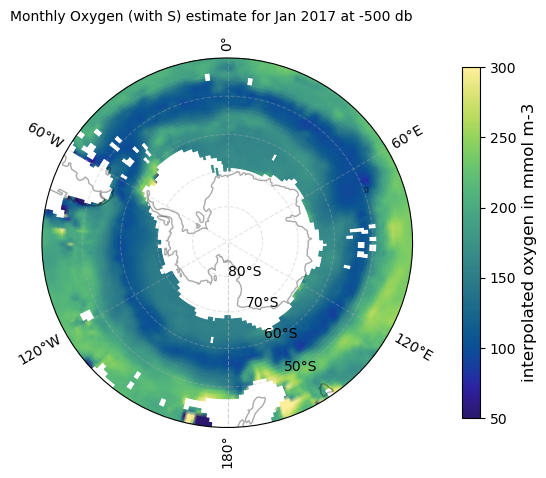

In [180]:
##BGC

fs = 12

import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

lon2,lat2 = np.meshgrid(lon,lat)

projection = ccrs.SouthPolarStereo()
data_crs = ccrs.PlateCarree()

#print(name_string)

tt = 30
#fig  = plt.figure(figsize=(18,10))
ax = plt.axes(projection=projection)
#ax.stock_img() #this fills in background with map image (blue water, white ice etc.)
ax.coastlines(alpha=0.3333)
gl = ax.gridlines(draw_labels=True,alpha=0.33, linestyle='--')
ax.set_extent([-180,180,-90, -40], crs=ccrs.PlateCarree())
ax.set_boundary(map_circle, transform=ax.transAxes)
result = plt.pcolormesh(lon,lat,mean_bgc+bgc_anom,cmap=cmocean.cm.haline, transform=data_crs, vmin=50, vmax=300, shading = 'gouraud')
##50 -350 for 500 db

cbar=plt.colorbar(orientation='vertical',shrink=0.95,pad=0.1)#,ticks=cticks) #fraction=0.075, pad=0.15,shrink=1.0
cbar.set_label('interpolated oxygen in mmol m-3',fontsize=fs)
plt.xlabel('Longitude in °E',fontsize=fs)
plt.ylabel('Latitude in °N',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

#cbar.ax.set_xticklabels(cticks_label)
plt.annotate(('Monthly Oxygen (with S) estimate for Jan ' + str(2017)) + ' at ' + str(-500) + ' db',xy=(1.0,1.1),
             xycoords='axes fraction',fontsize=10,ha='right')
#plt.annotate('time step '+str(tt+1),xy=(0.99,1.015),\
#                     xycoords='axes fraction',fontsize=fs,ha='right')#,color='k',fontweight='bold')
#plt.show()
plt.savefig(savepath + 'oxy_with_S_Jan17_500db.png')

In [229]:
##Difference plots
ds = xr.open_dataset('/global/cfs/cdirs/m4003/kfalcinelli/E3SM_output/test_file_new_IC_2017_O2_regridded.nc')
#display(ss)

ds1 = ds.timeMonthly_avg_ecosysTracers_O2[0,13,:,:]
ds2 = ds1[:,-1].assign_coords(lon = -180)
ds2 = xr.concat([ds2,ds1],"lon")
#ds3 = ds3[0:42,:]
model = ds2.sel(lat = slice(-81, -40))
model = np.squeeze(model.values)
model.shape

(42, 361)

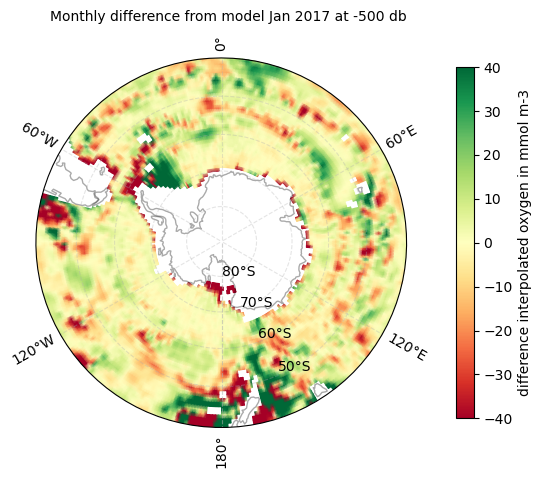

In [230]:
lon2,lat2 = np.meshgrid(lon,lat)
fs = 10

projection = ccrs.SouthPolarStereo()
data_crs = ccrs.PlateCarree()

#print(name_string)
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

diff = mean_bgc+bgc_anom-model

#fig  = plt.figure(figsize=(18,10))
ax = plt.axes(projection=projection)
#ax.stock_img() #this fills in background with map image (blue water, white ice etc.)
ax.coastlines(alpha=0.3333)
gl = ax.gridlines(draw_labels=True,alpha=0.33, linestyle='--')
ax.set_extent([-180,180,-90, -40], crs=ccrs.PlateCarree())
ax.set_boundary(map_circle, transform=ax.transAxes)
result = plt.pcolormesh(lon,lat,diff,cmap='RdYlGn', transform=data_crs, vmin=-40, vmax=40, shading = 'gouraud')
cbar=plt.colorbar(orientation='vertical',shrink=0.95,pad=0.1)#,ticks=cticks) #fraction=0.075, pad=0.15,shrink=1.0
cbar.set_label('difference interpolated oxygen in mmol m-3',fontsize=10)
plt.xlabel('Longitude in °E',fontsize=fs)
plt.ylabel('Latitude in °N',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

#cbar.ax.set_xticklabels(cticks_label)
plt.annotate(('Monthly difference from model Jan ' + str(2017)) + ' at ' + str(-500) + ' db',xy=(1.0,1.1),
             xycoords='axes fraction',fontsize=10,ha='right')
#plt.annotate('time step '+str(tt+1),xy=(0.99,1.015),\
#                     xycoords='axes fraction',fontsize=fs,ha='right')#,color='k',fontweight='bold')
#plt.show()
plt.savefig(savepath + 'diff_oxy_500db_Jan17.png')

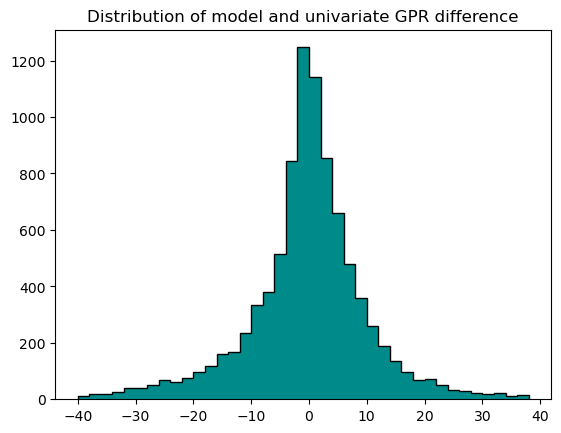

In [214]:
diff = diff.flatten()
diff = diff[~np.isnan(diff)]
diff_edit = diff[(diff >= -40) & (diff <= 40)] 

plt.hist(diff, bins=np.arange(-40,40,2), color='darkcyan')
plt.hist(diff, bins=np.arange(-40,40,2), histtype = 'step', color='k')
plt.title('Distribution of model and univariate GPR difference')
plt.savefig(savepath + 'diffhist_oxy_500db_Jan17.png')

(array([  17.,   24.,   24.,   31.,   30.,   41.,   57.,   74.,   80.,
          86.,  103.,  141.,  144.,  180.,  236.,  283.,  403.,  554.,
         787., 1363., 1328.,  954.,  689.,  438.,  368.,  270.,  187.,
         169.,  124.,   86.,   68.,   84.,   68.,   66.,   52.,   46.,
          37.,   31.,   29.]),
 array([-40., -38., -36., -34., -32., -30., -28., -26., -24., -22., -20.,
        -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,
          4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,
         26.,  28.,  30.,  32.,  34.,  36.,  38.]),
 <BarContainer object of 39 artists>)

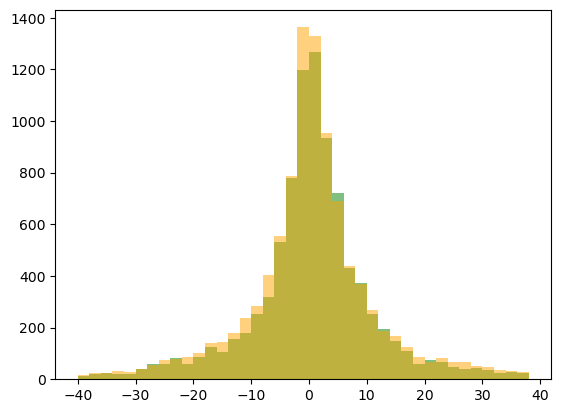

In [205]:
#plt.hist(diffS, bins=np.arange(-40,40,2),color='darkcyan', alpha = 0.5)

plt.hist(diffT, bins=np.arange(-40,40,2), color='green', alpha = 0.5)

plt.hist(diffU, bins=np.arange(-40,40,2), color='orange', alpha = 0.5)

In [215]:
mean = np.mean(diff_edit)
std = np.std(diff_edit)
mean, std

(-0.30397421035136307, 10.413329390148109)

In [70]:
##Difference histogram
diff_total = []
##for m = 0
ds = xr.open_dataset('/global/cfs/cdirs/m4003/kfalcinelli/E3SM_output/test_file_new_IC_2017_O2_regridded.nc')
ds1 = ds.timeMonthly_avg_ecosysTracers_O2[0,13,:,:]
ds2 = ds1[:,-1].assign_coords(lon = -180.5)
ds2 = xr.concat([ds2,ds1],"lon")
#ds3 = ds3[0:42,:]
model = ds2.sel(lat = slice(-81.5, -40.5))
model = np.squeeze(model.values)

ls = xr.open_dataset('/global/homes/k/kefalc/code/anom_files/final/oxy/grid/grid_oxygen_mean_ws700_plevel2_dates17167.0_17531.0_test0.nc')
ls1 = ls.mean_bgc[:,:,0:7,0]
ls2 = ls1[:,-1].assign_coords(longitude = -180.5)
ls3 = xr.concat([ls2,ls1],"longitude")
ls4 = ls3.sel(latitude = slice(-81, -40))
lon  = ls4['longitude'].values
lat  = ls4['latitude'].values

mean_bgc = np.squeeze(ls4.values)
mean_bgc = mean_bgc[:,:,:].mean(axis = 1)

ss = xr.open_dataset('//global/homes/k/kefalc/code/gpr-mapping-covar/plevel4_T_O2_SouthernOcean.nc')
ss1 = ss.anom[:,:,0:7]
ss2 = ss1[:,-1].assign_coords(longitude = -180.5)
ss3 = xr.concat([ss2,ss1],"longitude")
bgc_anom = np.squeeze(ss3.values)
bgc_anom = bgc_anom.mean(axis = 1)

diff = mean_bgc+bgc_anom-model

for m in range (1,12):
    ds1 = ds.timeMonthly_avg_ecosysTracers_O2[m,13,:,:]
    ds2 = ds1[:,-1].assign_coords(lon = -180.5)
    ds2 = xr.concat([ds2,ds1],"lon")
    #ds3 = ds3[0:42,:]
    model = ds2.sel(lat = slice(-81.5, -40.5))
    model = np.squeeze(model.values)


    ls1 = ls.mean_bgc[:,:,(6*m)+1:(6*m)+7,0]
    ls2 = ls1[:,-1].assign_coords(longitude = -180.5)
    ls3 = xr.concat([ls2,ls1],"longitude")
    ls4 = ls3.sel(latitude = slice(-81, -40))
    mean_bgc = np.squeeze(ls4.values)
    mean_bgc = mean_bgc[:,:,:].mean(axis = 1)

    ss1 = ss.anom[:,:,(6*m)+1:(6*m)+7]
    ss2 = ss1[:,-1].assign_coords(longitude = -180.5)
    ss3 = xr.concat([ss2,ss1],"longitude")
    bgc_anom = np.squeeze(ss3.values)
    bgc_anom = bgc_anom.mean(axis = 1)

    diff_new = mean_bgc+bgc_anom-model

    diff = np.concatenate((diff, diff_new))

/tmp/ipykernel_1043110/3866142238.py:52: RuntimeWarning: Mean of empty slice.
  bgc_anom = bgc_anom.mean(axis = 1)
/global/homes/k/kefalc/.conda/envs/myenv/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [15]:
diff = diff.flatten()
diff = diff[~np.isnan(diff)]
diff_edit = diff[(diff >= -40) & (diff <= 40)] 

mean = np.mean(diff_edit)
std = np.std(diff_edit)
mean, std

# plt.hist(diff, bins=np.arange(-40,40,2), color='darkcyan')
# plt.hist(diff, bins=np.arange(-40,40,2), histtype = 'step', color='k')
# plt.title('Distribution of model and multivariate GPR difference (with T)')

# def func(x, a, b, c):
#     # a Gaussian distribution
#     return a * np.exp(-(x-b)**2/(2*c**2))

# list1 = range(-40, 40)
# #list2 = np.random.normal(0,.06,80)
# width = 1/1.5

# popt, pcov = curve_fit(func, list1, list2,p0=[.1,0,10])

# x = np.linspace(-40, 40, 80)
# y = func(x, *popt)

# plt.plot(x+10, y, c='g')

(1.1146694035546958, 13.486647586655327)

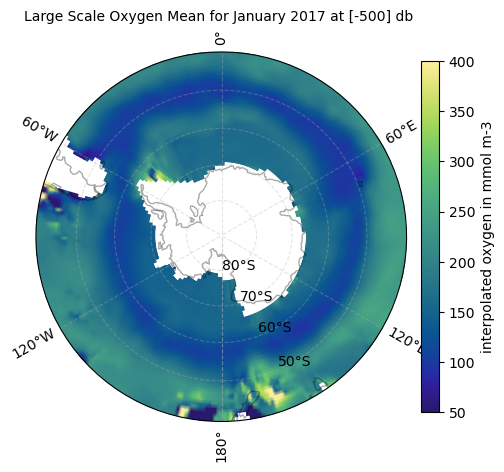

In [138]:
ds = xr.open_dataset('/global/homes/k/kefalc/code/anom_files/final/oxy/grid/grid_oxygen_mean_ws700_plevel4_dates17167.0_17531.0_test0.nc')
#plt.figure(figsize=(16,12))

import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

ds1 = ds.mean_bgc[:,:,0:6,0]
ds2 = ds1[:,-1].assign_coords(longitude = -180.5)
ds3 = xr.concat([ds2,ds1],"longitude")

projection = ccrs.SouthPolarStereo()
data_crs = ccrs.PlateCarree()

ax = plt.axes(projection=projection)
#ax.stock_img() #this fills in background with map image (blue water, white ice etc.)
ax.coastlines(alpha=0.3333)
gl = ax.gridlines(draw_labels=True,alpha=0.33, linestyle='--')
ax.set_extent([-180,180,-90, -40], crs=ccrs.PlateCarree())
ax.set_boundary(map_circle, transform=ax.transAxes)
oxy = plt.pcolormesh(ds3.longitude,ds3.latitude,ds3.mean(axis = 1), cmap=cmocean.cm.haline, transform = data_crs, vmin = 50, vmax = 400,  shading = 'gouraud')
cbar=plt.colorbar(orientation='vertical',shrink=0.95,pad=0.03)#,ticks=cticks) #fraction=0.075, pad=0.15,shrink=1.0
cbar.set_label('interpolated oxygen in mmol m-3')


plt.title('Large Scale Oxygen Mean for January 2017 at ' + str(ds.pressure.values)+ ' db ', fontsize=10)
plt.show()
#plt.savefig(savepath + 'Test_Salinity_Mean_250db_Map.png')

In [231]:
#open small scale dataset
ss = xr.open_dataset('/global/homes/k/kefalc/code/gpr-mapping-covar/plevel4_S_O2_SouthernOcean.nc')
ss1 = ss.anom.sel(time=slice('2017-01-01', '2017-01-31'))
ss2 = ss1[:,-1].assign_coords(longitude = -180)
ss3 = xr.concat([ss2,ss1],"longitude")
ss4 = ss3.sel(latitude = slice(-81, -40))

lon  = ss4['longitude'].values
lat  = ss4['latitude'].values

bgc_anom = np.squeeze(ss4.values)
bgc_anom = bgc_anom.mean(axis = 1)
print(bgc_anom.shape)

(42, 361)


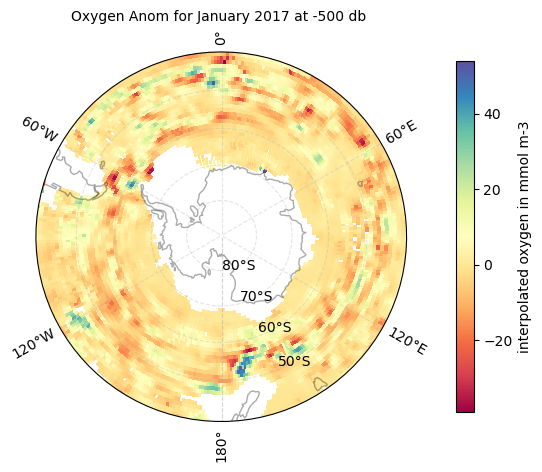

<Figure size 640x480 with 0 Axes>

In [235]:
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

projection = ccrs.SouthPolarStereo()
data_crs = ccrs.PlateCarree()

ax = plt.axes(projection=projection)
#ax.stock_img() #this fills in background with map image (blue water, white ice etc.)
ax.coastlines(alpha=0.3333)
gl = ax.gridlines(draw_labels=True,alpha=0.33, linestyle='--')
ax.set_extent([-180,180,-90, -40], crs=ccrs.PlateCarree())
ax.set_boundary(map_circle, transform=ax.transAxes)
oxy = plt.pcolormesh(lon,lat,bgc_anom, cmap='Spectral', transform = data_crs)#, vmin = -500, vmax = 500)
cbar=plt.colorbar(orientation='vertical',shrink=0.95,pad=0.1)#,ticks=cticks) #fraction=0.075, pad=0.15,shrink=1.0
cbar.set_label('interpolated oxygen in mmol m-3')


plt.title('Oxygen Anom for January 2017 at ' + str(-500)+ ' db ', fontsize=10)
plt.show()
plt.savefig(savepath + 'anomexample.png')

In [266]:
#open large scale dataset
ls = xr.open_dataset('/global/homes/k/kefalc/code/anom_files/final/oxy/grid/grid_oxygen_mean_ws700_plevel4_dates17167.0_17531.0_test0.nc')

# ls1 = ls.mean_bgc[:,:,0:7,0] --This includes one day from Feb 2017.  Instead, use the following:
ls1 = ls.mean_bgc.sel(time=slice('2017-01-01', '2017-1-31'))

# The mapped data has longitudes that are whole numbers, so need to use -180 here
ls2 = ls1[:,-1].assign_coords(longitude = -180)
ls3 = xr.concat([ls2,ls1],"longitude")

# This line will select the right latitude range, to match the new grid for the small-scale anomalies
ls4 = ls3.sel(latitude = slice(-81, -40))

lon  = ls4['longitude'].values
lat  = ls4['latitude'].values
lat

mean_bgc = np.squeeze(ls4.values)
mean_bgc = mean_bgc[:,:,:].mean(axis = 1)
print(mean_bgc.shape)

(42, 361)


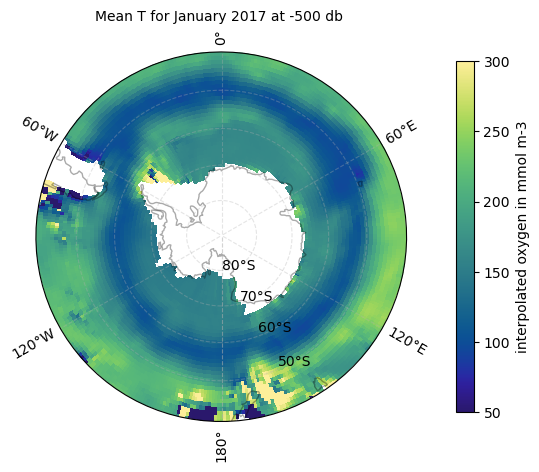

<Figure size 640x480 with 0 Axes>

In [269]:

import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

projection = ccrs.SouthPolarStereo()
data_crs = ccrs.PlateCarree()

ax = plt.axes(projection=projection)
#ax.stock_img() #this fills in background with map image (blue water, white ice etc.)
ax.coastlines(alpha=0.3333)
gl = ax.gridlines(draw_labels=True,alpha=0.33, linestyle='--')
ax.set_extent([-180,180,-90, -40], crs=ccrs.PlateCarree())
ax.set_boundary(map_circle, transform=ax.transAxes)
oxy = plt.pcolormesh(lon,lat,mean_bgc, cmap=cmocean.cm.haline, transform = data_crs, vmin = 50, vmax = 300)
cbar=plt.colorbar(orientation='vertical',shrink=0.95,pad=0.1)#,ticks=cticks) #fraction=0.075, pad=0.15,shrink=1.0
cbar.set_label('interpolated oxygen in mmol m-3')


plt.title('Mean T for January 2017 at ' + str(-500)+ ' db ', fontsize=10)
plt.show()
plt.savefig(savepath + 'Oexample.png')

In [6]:
##correlation coefficients
bgcres = xr.open_dataset('/global/homes/k/kefalc/code/anom_files/final/oxy/res/residualfile_plevel2oxygen_dates16436.0_18261.0_test0.nc')
tsres = xr.open_dataset('/global/homes/k/kefalc/code/data_files/Final/forbgc_residualfile_plevel2_dates16436.0_18261.0_test0.nc')

In [7]:
x = bgcres.residuals_bgc.values
x = x.flatten()
y = tsres.residuals_temp.values
y = y.flatten()


coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Create the best fit line
y_predicted = slope * x + intercept
print(slope)

# Plot the original data and the best fit line
# plt.scatter(x, y, s=5, color = 'k')
# plt.plot(x, y_predicted, color='red', label='Correlation Coefficient')
# plt.xlabel('Oxygen Residuals')
# plt.ylabel('Temperature Residuals')
# plt.title('Correlation Coefficient for T & O at 100 db')
# plt.legend()
# plt.show()

-0.02274987586524155


In [8]:
x = bgcres.residuals_bgc.values
x = x.flatten()
y = tsres.residuals_sal.values
y = y.flatten()


coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Create the best fit line
y_predicted = slope * x + intercept
print(slope)

# Plot the original data and the best fit line
# plt.scatter(x, y, s=5, color = 'k')
# plt.plot(x, y_predicted, color='red', label='Correlation Coefficient')
# plt.xlabel('Oxygen Residuals')
# plt.ylabel('Salinity Residuals')
# plt.title('Correlation Coefficient for S & O at 100 db')
# plt.legend()
# plt.show()

-0.004166529018141382


In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 6])

# Calculate the coefficients for the best fit line (linear in this case)
# polyfit returns [slope, intercept] for a linear fit
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Create the best fit line
y_predicted = slope * x + intercept

# Plot the original data and the best fit line
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_predicted, color='red', label='Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Best Fit Line')
plt.legend()
plt.show()

In [4]:
ds = xr.open_dataset('/global/homes/k/kefalc/code/gpr-mapping-covar/plevel4_test.nc')
ds

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

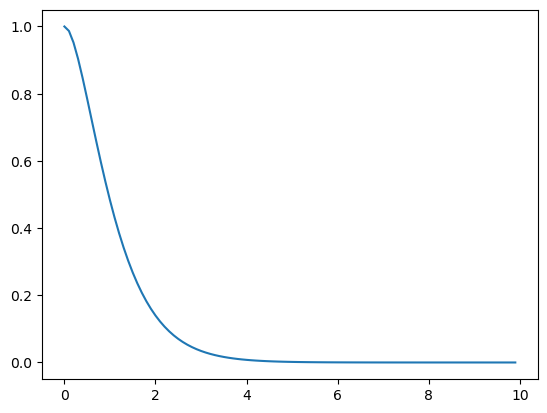

In [282]:
x = np.arange(0,10,.1)
y = (1 + np.sqrt(3)*x)*np.exp(-np.sqrt(3)*x)

plt.plot(x,y)